
Epoch 1

 Input #1: [10  2 -1]
 Target: [ 1 -1 -1]
    Neuron 1: net=0.00, output=1, error=0
    Updated weights[0]: [0.0 0.0 0.0]
    Neuron 2: net=0.00, output=1, error=-2
    Updated weights[1]: [-2.0 -0.4  0.2]
    Neuron 3: net=0.00, output=1, error=-2
    Updated weights[2]: [-2.0 -0.4  0.2]

 Input #2: [ 2 -5 -1]
 Target: [-1  1 -1]
    Neuron 1: net=0.00, output=1, error=-2
    Updated weights[0]: [-0.4  1.0  0.2]
    Neuron 2: net=-2.20, output=-1, error=2
    Updated weights[1]: [-1.6 -1.4  0.0]
    Neuron 3: net=-2.20, output=-1, error=0
    Updated weights[2]: [-2.0 -0.4  0.2]

 Input #3: [-5  5 -1]
 Target: [-1 -1  1]
    Neuron 1: net=6.80, output=1, error=-2
    Updated weights[0]: [0.6 0.0 0.4]
    Neuron 2: net=1.00, output=1, error=-2
    Updated weights[1]: [-0.6 -2.4  0.2]
    Neuron 3: net=7.80, output=1, error=0
    Updated weights[2]: [-2.0 -0.4  0.2]
 Total error in this epoch: 12

Epoch 2

 Input #1: [10  2 -1]
 Target: [ 1 -1 -1]
    Neuron 1: net=5.60, outpu

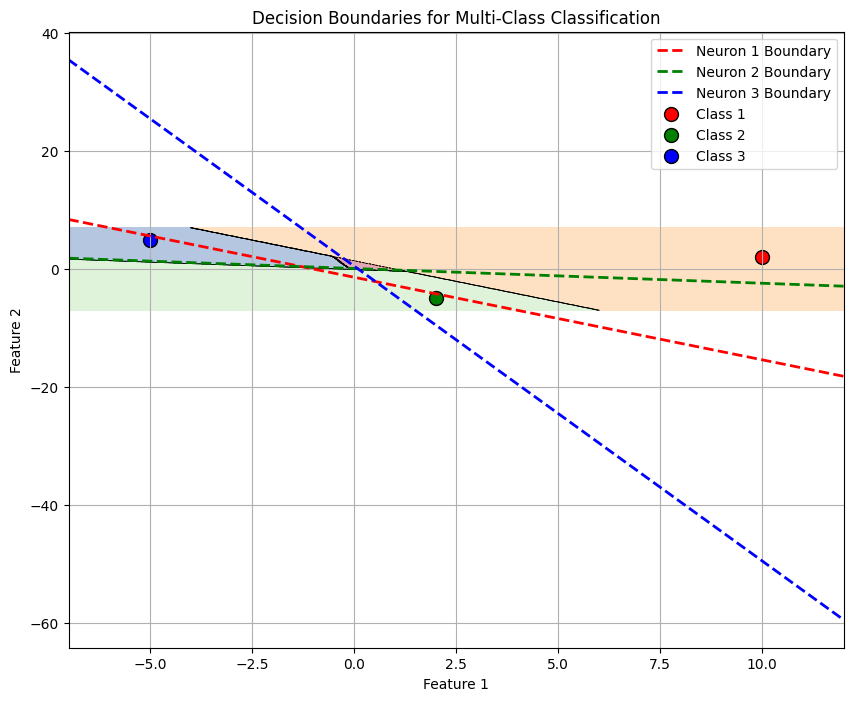

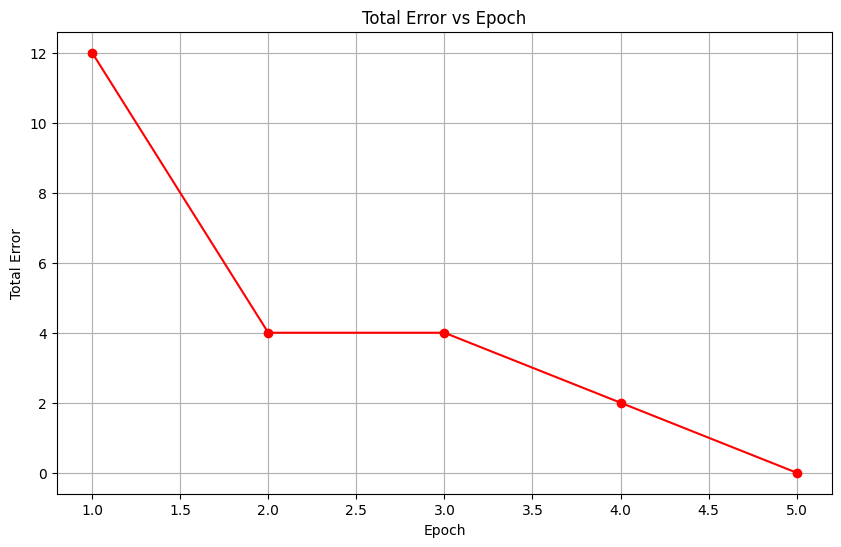


All visualizations have been generated and saved!


''

In [1]:
# Case 1: Training function for discrete single-layer neural network
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Format floats with 1 decimal, and show trailing zeros (0.0) 设置浮点数输出格式
np.set_printoptions(precision=1, floatmode='fixed')

# Sign activation function (discrete)
def sign(x):
    return 1 if x >= 0 else -1

def train_discrete_network(inputs, targets, learning_rate=0.1, max_epochs=100):
    """
    :param inputs: input data matrix, shape = [number of samples, number of features]
    :param targets: teacher signal matrix, shape = [number of samples, number of output neurons]
    :param learning_rate: how fast weights update during learning
    :param max_epochs: maximum training iterations
    """
    num_samples, num_features = inputs.shape    # get num of samples & num of features（特征维度）
    num_outputs = targets.shape[1]              # get num of output neuron（输出神经元个数）

    # initialize weights: shape = [outputs, features] （权重初始化=0，每个输出神经元都有一组权重）
    weights = np.zeros((num_outputs, num_features))
    
    # Track weight and error history for visualization
    weight_history = [weights.copy()]
    error_history = []

    # start training loop
    for epoch in range(max_epochs):
        total_error = 0                     # initialize total error for this epoch = 0
        print(f"\nEpoch {epoch + 1}")
        for k in range(num_samples):        # loop over each training sample
            input_vector = inputs[k]        # input sample (1 row)（当前输入向量）
            target_vector = targets[k]      # target output (1 row)（对应的教师信号）
            print(f"\n Input #{k+1}: {input_vector}")
            print(f" Target: {target_vector}")
            
            # Store outputs for visualization
            neuron_outputs = []
            
            for out_idx in range(num_outputs):          # loop over each output neuron
                net_input = np.dot(weights[out_idx], input_vector)  # net_input：w·x
                output = sign(net_input)                            # sign activation function
                neuron_outputs.append(output)
                error = target_vector[out_idx] - output             # error = teacher - output
                # delta rule: w = w + learning rate * error * x
                weights[out_idx] += learning_rate * error * input_vector
                # accumulate error
                total_error += abs(error)
                # show details for this neuron
                print(f"    Neuron {out_idx+1}: net={net_input:.2f}, output={output}, error={error}")
                print(f"    Updated weights[{out_idx}]: {weights[out_idx]}")
                
        # Store weights after this epoch
        weight_history.append(weights.copy())
        error_history.append(total_error)
        
        # show total error for this epoch
        print(f" Total error in this epoch: {total_error}")
        # training ends if total error = 0
        if total_error == 0:
            print("Training complete: Total error is 0.")
            break

    return weights, weight_history, error_history      # return trained weights and history

# training data & teacher signal
x_case1 = np.array([
    [10,  2, -1],
    [ 2, -5, -1],
    [-5,  5, -1]
])

t_case1 = np.array([
    [ 1, -1, -1],
    [-1,  1, -1],
    [-1, -1,  1]
])

# train the network using case 1 data
trained_weights, weight_history, error_history = train_discrete_network(x_case1, t_case1)

# show final weight vector for each output neuron
print("\nFinal Weights for Each Output Neuron:")
for i in range(trained_weights.shape[0]):
    print(f"Neuron {i+1} weights: {trained_weights[i]}")

# Visualization Functions

# 1. Decision Boundaries Plot
def plot_decision_boundaries():
    plt.figure(figsize=(10, 8))
    
    # Define the grid to visualize
    x_min, x_max = min(x_case1[:, 0]) - 2, max(x_case1[:, 0]) + 2
    y_min, y_max = min(x_case1[:, 1]) - 2, max(x_case1[:, 1]) + 2
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), 
                        np.linspace(y_min, y_max, 500))
    
    # Prepare mesh points (with bias term)
    mesh_points = np.c_[xx.ravel(), yy.ravel(), np.ones(xx.ravel().shape) * -1]
    
    # Calculate outputs for each mesh point
    Z = np.zeros((mesh_points.shape[0], trained_weights.shape[0]))
    for i in range(trained_weights.shape[0]):
        net_inputs = np.dot(mesh_points, trained_weights[i])
        Z[:, i] = [sign(net) for net in net_inputs]
    
    # Determine which class has a positive output for each point
    # If multiple neurons output 1, assign to the first one (arbitrary)
    class_assignments = np.argmax(Z, axis=1)
    # If all outputs are -1, assign a special class (e.g., -1)
    class_assignments[np.max(Z, axis=1) < 0] = -1
    
    # Reshape for plotting
    class_assignments = class_assignments.reshape(xx.shape)
    
    # Plot decision boundaries
    plt.contourf(xx, yy, class_assignments, alpha=0.4, cmap=plt.cm.Spectral)
    plt.contour(xx, yy, class_assignments, colors='k', linewidths=0.5)
    
    # Plot individual decision boundaries for each neuron
    neuron_colors = ['r', 'g', 'b']
    for i in range(trained_weights.shape[0]):
        w = trained_weights[i]
        # Plot the decision boundary line: w[0]*x + w[1]*y + w[2] = 0
        if w[1] != 0:  # Avoid division by zero
            slope = -w[0] / w[1]
            intercept = -w[2] / w[1]
            x_vals = np.array([x_min, x_max])
            y_vals = slope * x_vals + intercept
            plt.plot(x_vals, y_vals, neuron_colors[i], 
                    label=f'Neuron {i+1} Boundary', 
                    linewidth=2, linestyle='--')
    
    # Plot data points
    target_classes = np.argmax(t_case1, axis=1)
    colors = ['red', 'green', 'blue']
    for i, point in enumerate(x_case1):
        class_idx = target_classes[i]
        plt.scatter(point[0], point[1], c=colors[class_idx], 
                  s=100, edgecolor='k', marker='o', 
                  label=f'Class {class_idx+1}' if i == class_idx else "")
    
    plt.title('Decision Boundaries for Multi-Class Classification')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.grid(True)
    # Create unique legend entries
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(), loc='best')
    plt.savefig('discrete_network_decision_boundaries.png')
    plt.show()

# 2. Error Plot
def plot_error_evolution():
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(error_history) + 1), error_history, 'r-o')
    plt.title('Total Error vs Epoch')
    plt.xlabel('Epoch')
    plt.ylabel('Total Error')
    plt.grid(True)
    plt.savefig('discrete_network_error_evolution.png')
    plt.show()


# Generate all visualizations
print("\nGenerating visualizations...")
plot_decision_boundaries()
plot_error_evolution()

print("\nAll visualizations have been generated and saved!")

input("\nPress ENTER to exit...")